In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [2]:
file_path = Path("../Unsupervised-Learning-Challenge/crypto_data.csv")
df = pd.read_csv(file_path)
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Discard all cryptocurrencies that are not being traded. In other words, filter for currencies that are currently being traded.
Trading = df.loc[df["IsTrading"] != False,:]
Trading

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Once you have done this, drop the IsTrading column from the dataframe.
TradingNew = Trading.drop("IsTrading", axis=1)
TradingNew.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [5]:
# Remove all rows that have at least one null value
cleaned_df = TradingNew.dropna()
cleaned_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
mined_df= cleaned_df.loc[cleaned_df['TotalCoinsMined'] > 0]
mined_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# In order for your dataset to be comprehensible to a machine learning algorithm, its data should be numeric. Since the coin names do not contribute to the analysis of the data
# delete the CoinName from the original dataframe.
nocoinname_df = mined_df.drop('CoinName', axis = 1)
nocoinname_df

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Your next step in data preparation is to convert the remaining features with text values, Algorithm and ProofType, 
# into numerical data. To accomplish this task, use Pandas to create dummy variables. 
# Examine the number of rows and columns of your dataset now. How did they change?
dummy = pd.get_dummies(nocoinname_df[['Algorithm','ProofType']])

In [9]:
dummy

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
scaler = StandardScaler()
scaled = scaler.fit_transform(dummy)
print(scaled[0:5])

[[-0.0433963  -0.0433963  -0.0433963  -0.06142951 -0.07530656 -0.0433963
  -0.06142951 -0.06142951 -0.0433963  -0.0433963  -0.19245009 -0.06142951
  -0.09740465 -0.0433963  -0.11547005 -0.07530656 -0.0433963  -0.0433963
  -0.15191091 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.08703883
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.06142951 -0.0433963
  -0.08703883 -0.08703883 -0.08703883 -0.0433963  -0.13118084 -0.13840913
  -0.13840913 -0.0433963  -0.06142951 -0.0433963  -0.07530656 -0.18168574
  -0.0433963  -0.0433963  -0.0433963  -0.07530656 -0.15826614 -0.31491833
  -0.0433963  -0.08703883 -0.07530656 -0.06142951  1.38675049 -0.0433963
  -0.0433963  -0.06142951 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.39879994 -0.0433963
  -0.18168574 -0.0433963  -0.08703883 -0.08703883 -0.10680283 -0.0433963
  -0.13118084 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.43911856 -0.0433963  -0.06142951 -0.0433

# Dimensionality Reduction

In [27]:
# instantiate the PCA model
# Initialize PCA model
pca = PCA(n_components=.99)

# Get two principal components for the iris data.
Cryto_pca = pca.fit_transform(scaled)


In [28]:
# Transform PCA data to a DataFrame
df_Cryto_pca = pd.DataFrame(
    data=Cryto_pca
)
df_Cryto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
0,1.016473,-0.688640,-1.683422e-15,1.027197e-15,-1.206092e-15,-9.193752e-14,-1.245210e-16,-0.763649,-1.064349,-0.342228,...,1.619631e-14,1.608741e-14,-0.677760,0.194554,0.147755,0.283606,-0.631753,-0.112756,0.143423,-0.111809
1,1.016473,-0.688640,-5.974984e-16,1.476626e-15,-1.034897e-15,-9.217601e-14,-9.408006e-16,-0.763649,-1.064349,-0.342228,...,1.595891e-14,1.629203e-14,-0.677760,0.194554,0.147755,0.283606,-0.631753,-0.112756,0.143423,-0.111809
2,1.790646,-0.745815,-4.239566e-14,-7.364801e-16,-6.513117e-16,-9.993580e-14,-1.937022e-15,-0.673741,-0.789218,-0.251182,...,-3.444478e-13,-4.676644e-13,0.612046,0.423242,0.277493,-0.363629,0.442546,-0.221140,-0.398763,0.007808
3,-1.323049,0.226531,-1.532676e-15,-2.558319e-16,-4.876399e-17,2.510190e-14,-6.168461e-16,0.224969,0.090717,0.079007,...,-6.516622e-14,-7.406973e-14,0.236809,0.162550,0.132244,-0.106275,0.457371,-0.100432,-0.315881,-0.000392
4,-2.038382,0.443387,7.191351e-15,2.153103e-15,1.527554e-15,5.966647e-14,6.324920e-16,0.271425,0.351418,0.181134,...,-5.743976e-14,-8.570907e-14,0.217354,-0.073694,0.362341,0.602560,-0.646577,-0.105350,0.097590,0.042860


In [29]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02184049, 0.02095944, 0.02087257, 0.02087257, 0.02087257,
       0.02087257, 0.02087257, 0.02017924, 0.01876709, 0.01782038,
       0.01663365, 0.01629717, 0.01582838, 0.0146632 , 0.01348556,
       0.01261915, 0.01231493, 0.01124722, 0.01073556, 0.01070931,
       0.01062566, 0.010607  , 0.01059351, 0.01056814, 0.01055528,
       0.01051038, 0.01049558, 0.01049558, 0.01049558, 0.01049558,
       0.01049371, 0.01048448, 0.01047706, 0.01047574, 0.0104696 ,
       0.01046945, 0.01046453, 0.01046274, 0.01045597, 0.01045597,
       0.01045597, 0.01045597, 0.01045359, 0.01044888, 0.01044754,
       0.01044312, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043628,
       0.01043628, 0.01043628, 0.01043628, 0.01043628, 0.01043

# TSNE

In [30]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

In [31]:
# Reduce dimensions
tsne_features = tsne.fit_transform(Cryto_pca)

In [32]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

In [33]:
tsne_features


array([[  8.726741 ,  -9.681745 ],
       [  4.2732987, -11.101932 ],
       [ 13.221718 , -17.75074  ],
       ...,
       [-20.465586 , -13.452133 ],
       [-19.15989  ,  -2.939953 ],
       [  2.6095653,   7.0569754]], dtype=float32)

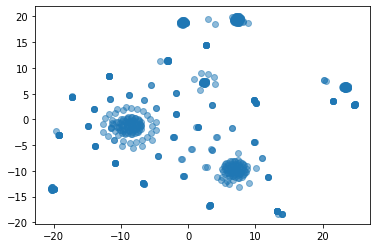

In [36]:
# Visualize the clusters
plt.scatter(x = tsne_features[:,0], y = tsne_features[:,1], alpha=0.5)

plt.show()

# Cluster Analysis with k-Means

C:\Users\Priya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


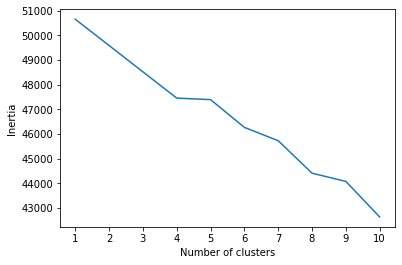

In [39]:
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(Cryto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Recommendation
Cosidering the above graph i can say that it starts to even out around k = 9.
The tsne graph shows clusters are nicely spaced apart and grouped together but will definitely need more details to draw conclusion for cryptocurrencies be clustered together or not.